<a href="https://colab.research.google.com/github/jungsooin00/myrepo/blob/main/Women's_Tennis_Serve_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Women's Tennis Serve Stats
### Rachel In    rji245
#### SDS 348
#### 5/10/2021

*This dataset includes the service game stats for the top 50 women's tennis players in the Women's Tennis Association for 2019. I referred to the WTA Tennis website as well as a website called TennisAbstract to collect and acquire the data.*

In [1]:
# Run to allow multiple outputs from a single chunk
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
# Import and view the dataset
serve = pd.read_excel("/content/WTA_Top_50_Serve_Stats.xlsx")
serve.head()

,Rank,player,Hand,Height,M,M W,M W Perc,SPW,Aces,AcePerc,DFs,DFPerc,1stln,1stPerc,2ndPerc,HldPerc
0,1st,A.Barty,right,under,64,52,0.813,0.637,409,0.092,198,0.044,0.577,0.729,0.512,0.797
1,2nd,N.Osaka,right,above,51,40,0.784,0.621,351,0.098,97,0.027,0.609,0.719,0.469,0.778
2,3rd,S.Halep,right,under,56,39,0.696,0.587,87,0.023,138,0.037,0.692,0.635,0.479,0.698
3,4th,S.Kenin,right,under,70,48,0.686,0.599,137,0.026,278,0.052,0.654,0.662,0.480,0.742
4,5th,E.Svitolina,right,under,61,39,0.639,0.580,226,0.050,183,0.041,0.603,0.667,0.448,0.697


In [4]:
# Number of observations and columns
serve.shape

(50, 16)

In [5]:
# Information about the variables
serve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      50 non-null     object 
 1   player    50 non-null     object 
 2   Hand      50 non-null     object 
 3   Height    50 non-null     object 
 4   M         50 non-null     int64  
 5   M W       50 non-null     int64  
 6   M W Perc  50 non-null     float64
 7   SPW       50 non-null     float64
 8   Aces      50 non-null     int64  
 9   AcePerc   50 non-null     float64
 10  DFs       50 non-null     int64  
 11  DFPerc    50 non-null     float64
 12  1stln     50 non-null     float64
 13  1stPerc   50 non-null     float64
 14  2ndPerc   50 non-null     float64
 15  HldPerc   50 non-null     float64
dtypes: float64(8), int64(4), object(4)
memory usage: 6.4+ KB


* The dataset includes 16 variables (12 numerical and 4 categorical) and 50 observations. For the numeric variables, there are 8 where the data type is considered _float64_ (double presicion float), and 4 which are considered the data type _int64_ (integer).

### Summary Statistics
*For more information of the variables, I provided some summary statistics for the numeric variables. They include the number of observations (count), some descriptive statistics (min, max, median, and mean), standard deviation (std), quartile values (25%, 50%, and 75%), and variance (var).*

In [6]:
# Summary statistics
(serve.describe()
.T)
(serve.filter(['M','M W', 'M W Perc', 'SPW', 'Aces', 'AcePerc', 'DFs','DFPerc', '1stln', '1stPerc', '2ndPerc', 'HldPerc'])
.agg(['median', 'var'])
.T)

,count,mean,std,min,25%,50%,75%,max
M,50.0,47.58000,12.010353,25.000,40.00000,47.5000,54.50000,81.000
M W,50.0,30.00000,9.936533,14.000,23.00000,28.0000,35.00000,55.000
M W Perc,50.0,0.62470,0.097700,0.455,0.54700,0.6090,0.68425,0.862
SPW,50.0,0.58416,0.027177,0.488,0.56825,0.5810,0.59875,0.646
Aces,50.0,156.44000,110.715145,0.000,70.50000,135.0000,205.00000,488.000
AcePerc,50.0,0.04670,0.024952,0.000,0.02650,0.0425,0.05675,0.114
DFs,50.0,146.60000,83.182857,7.000,89.50000,126.0000,201.75000,350.000
DFPerc,50.0,0.04620,0.015314,0.024,0.03525,0.0430,0.05675,0.084
1stln,50.0,0.62216,0.039794,0.538,0.59500,0.6215,0.65150,0.726
1stPerc,50.0,0.65516,0.039929,0.564,0.63050,0.6480,0.68100,0.752


,median,var
M,47.5000,144.248571
M W,28.0000,98.734694
M W Perc,0.6090,0.009545
SPW,0.5810,0.000739
Aces,135.0000,12257.843265
AcePerc,0.0425,0.000623
DFs,126.0000,6919.387755
DFPerc,0.0430,0.000235
1stln,0.6215,0.001584
1stPerc,0.6480,0.001594


*An example of some summary statistics for a specific numeric variable grouped by a categorical variable is given below. The two variables used were _Aces_ and _Hand_.

In [7]:
(serve.filter(['Aces', 'Hand'])
.groupby(['Hand'])
.describe())

Aces                                                          
      count       mean         std   min    25%    50%     75%    max
Hand                                                                 
left    4.0  106.75000   96.240584  56.0  56.00   60.0  110.75  251.0
right  46.0  160.76087  111.764869   0.0  87.75  136.5  205.00  488.0

Based on this table, there are only 4 observations for left-handed players while there are 46 observations for right-handed players. Also, the mean number of aces and standard deviation are observed to be greater for right-heanded players. Other statistics are also found in the table.

### Exploratory Data Analysis
*Here, I took the numeric variable _AcePerc_ (percentage of aces) and the categorical variable _Height_ (above or equal/under 5'9"). To determine whether the mean ace percentage differs between players above and players equal to/under 5'9", an independent t-test was performed, where the null hypothesis was that the ace percentage means between players above and equal/under 5'9" were not significantly different. I also included visuals displaying the relationship between the two variables.

Text(0.5, 1.0, 'Violin Plot of Ace Percentage based on Height')

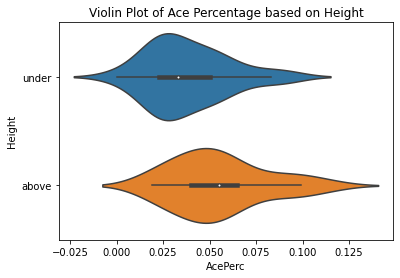

In [8]:
# Create violin plot to display relationship between 'AcePerc' and 'Height
sns.violinplot(data = serve, x = "AcePerc", y = "Height").set_title('Violin Plot of Ace Percentage based on Height')

In [9]:
# Perform independent t-test
stats.ttest_ind(serve['AcePerc'][serve['Height'] == 'above'],
                serve['AcePerc'][serve['Height'] == 'under'])

Ttest_indResult(statistic=2.512142306328478, pvalue=0.015415832560663072)

*The violin plot shows that the two white dots, which represent the mean/median, do not fall within each other's interquartile ranges (the bold black line). This indicates that the means of ace percentage between above and under are likely significantly different. After performing the independent t-test, I found that there was a significant difference in mean ace percentage between those above and those equal/under 5'9" since the p-value was less than 0.05 (t-stat = 2.51; p-value = 0.01).*

## Additional Visuals
*I constructed a heatmap for the correlation matrix of the numeric variables as well as univariate and bivariate plots for only 7 of the numeric variables since there would be too many plots if all 12 numeric variables were included.*
*Looking at the heatmap, only considering the magnitude and not the sign of the value, the highest correlation is found between _HldPerc_ and _SPW_ with 0.98, and the lowest correlation is found between _M W Perc_ and _2ndPerc_ with 0.016.


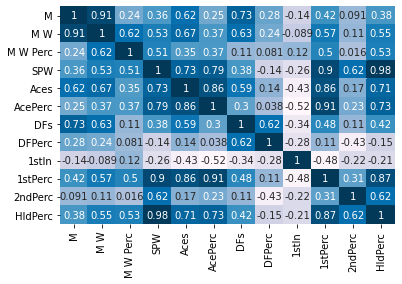

In [10]:
# Create heatmap for the correlation matrix (numeric variables)
sns.heatmap(serve.corr(),  annot = True, cbar_kws= {'orientation': 'horizontal'}, cbar = False, cmap = 'PuBu')

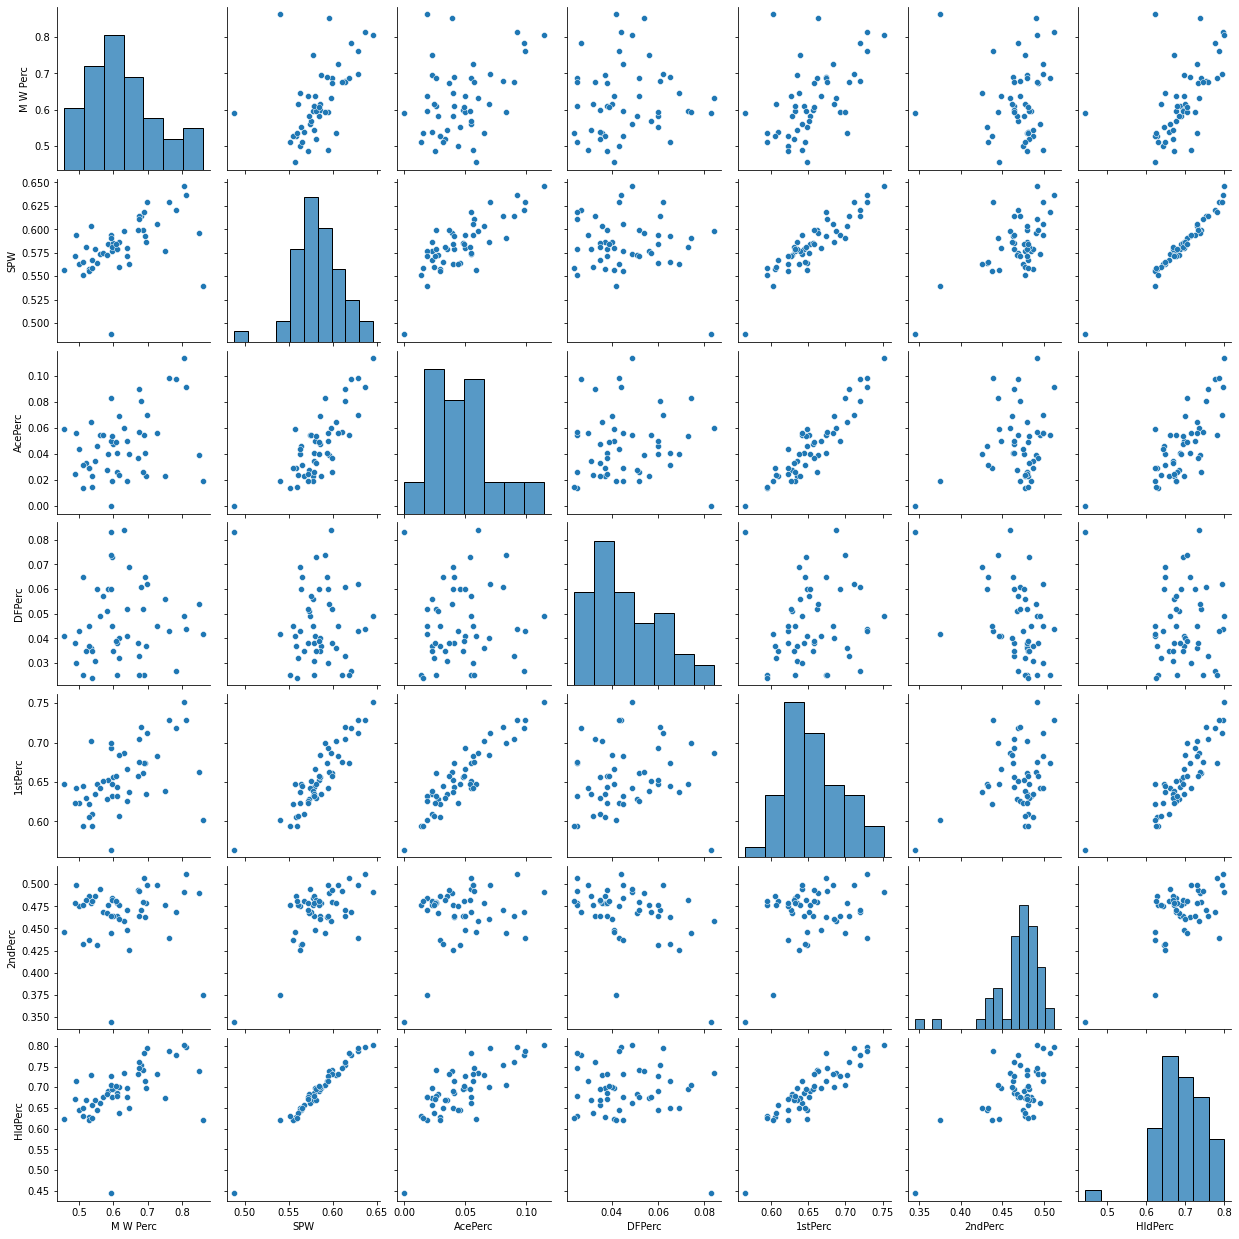

In [11]:
# Bivariate and univariate relationship plots
sns.pairplot(serve.filter(['M W Perc', 'SPW', 'AcePerc', 'DFPerc', '1stPerc', '2ndPerc', 'HldPerc']))

--------------------
### References
https://www.wtatennis.com/stats/2019 (https://www.wtatennis.com/stats/2019) and 
http://www.tennisabstract.com/cgi-bin/leaders_wta.cgi?f=A2019qqs00w1